In [5]:
import sys
from pathlib import Path
sys.path.append("..\..")

from src.data.matchers.smith_waterman import SmithWatermanMelodyMatcher
from src.data.structures.melody import Melody

In [6]:
MIN_LENGTH = 7
MATCH_SCORE = 1
MISMATCH_SCORE = -2
GAP_PENALTY = -1
TOLERANCE = 0.2
THRESHOLD_RATIO = 0.5

Similarity: 0.82


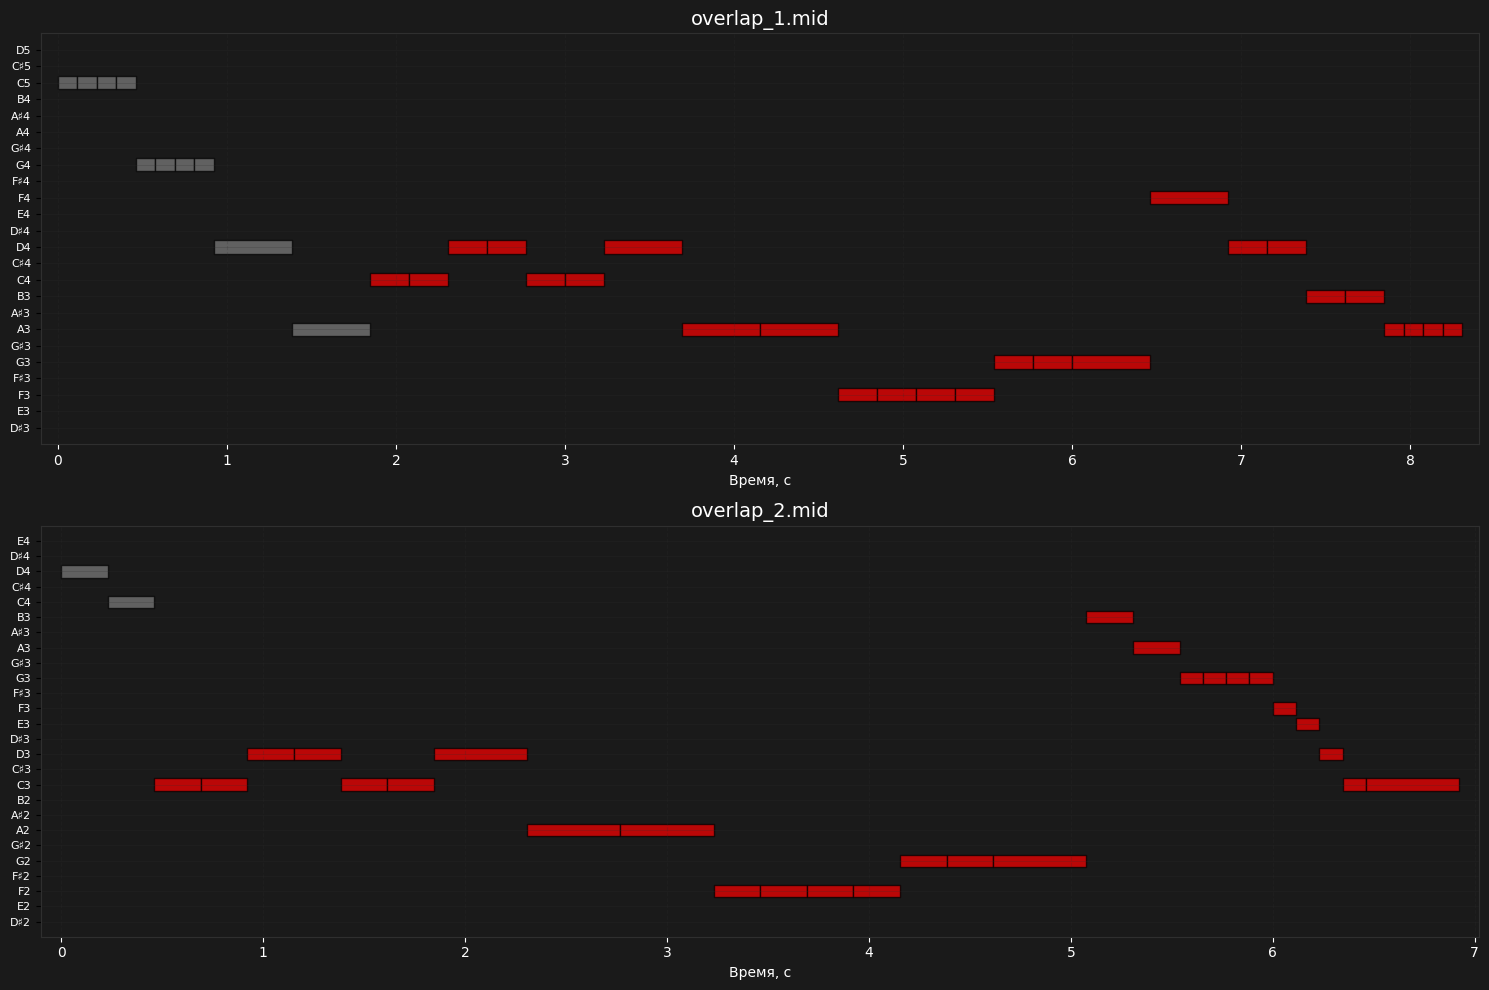

Similarity: 0.74


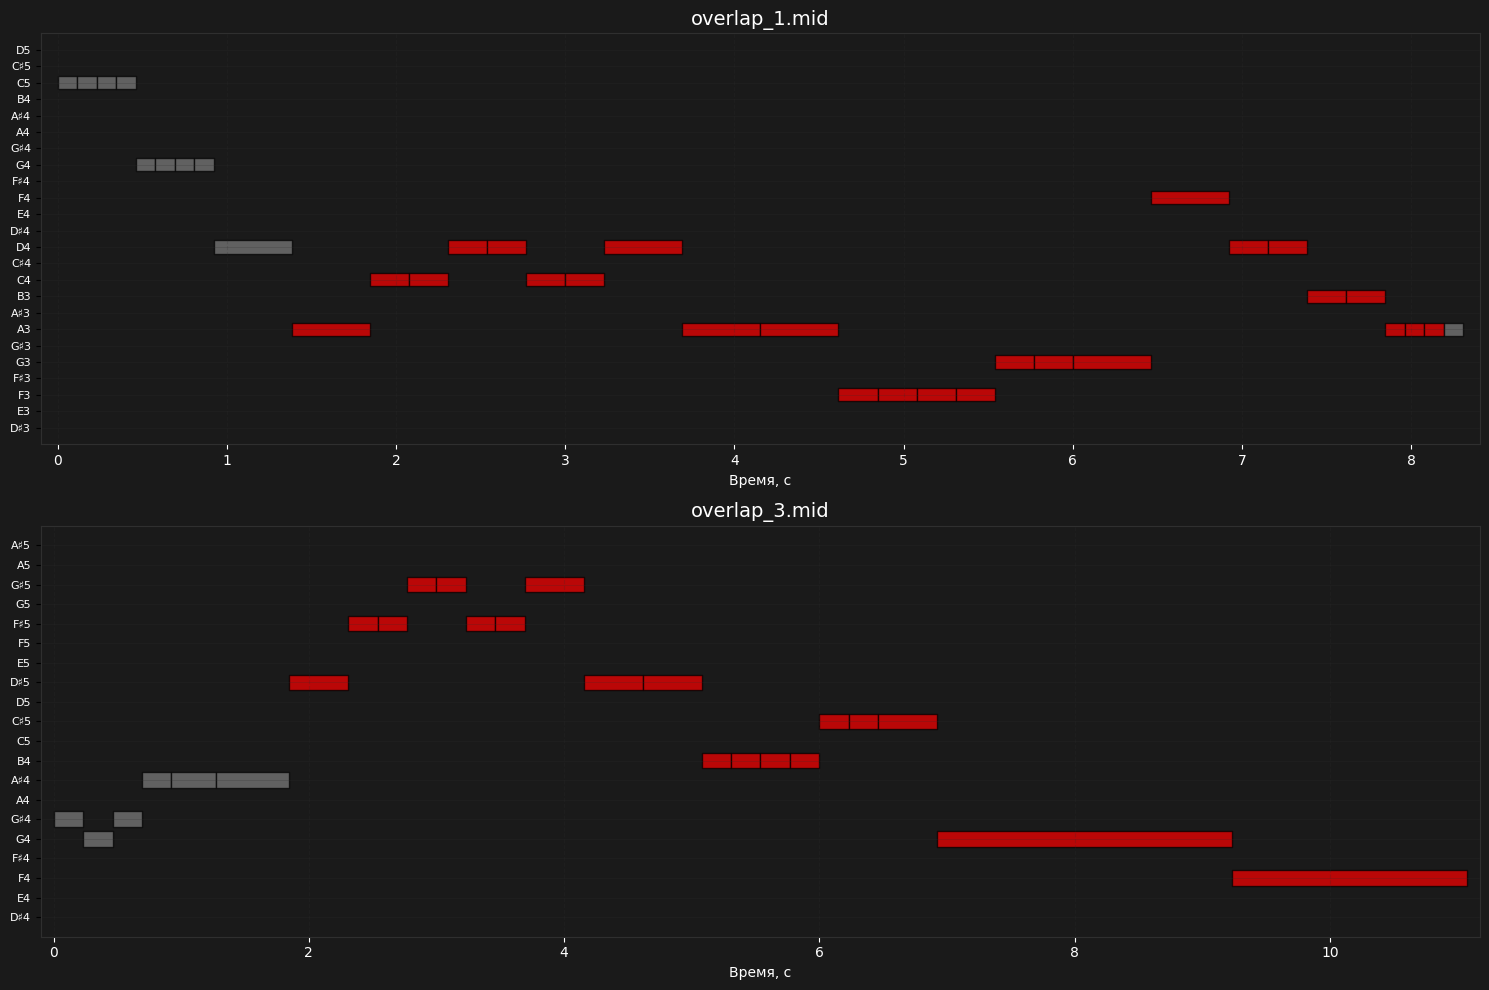

Similarity: 0.81


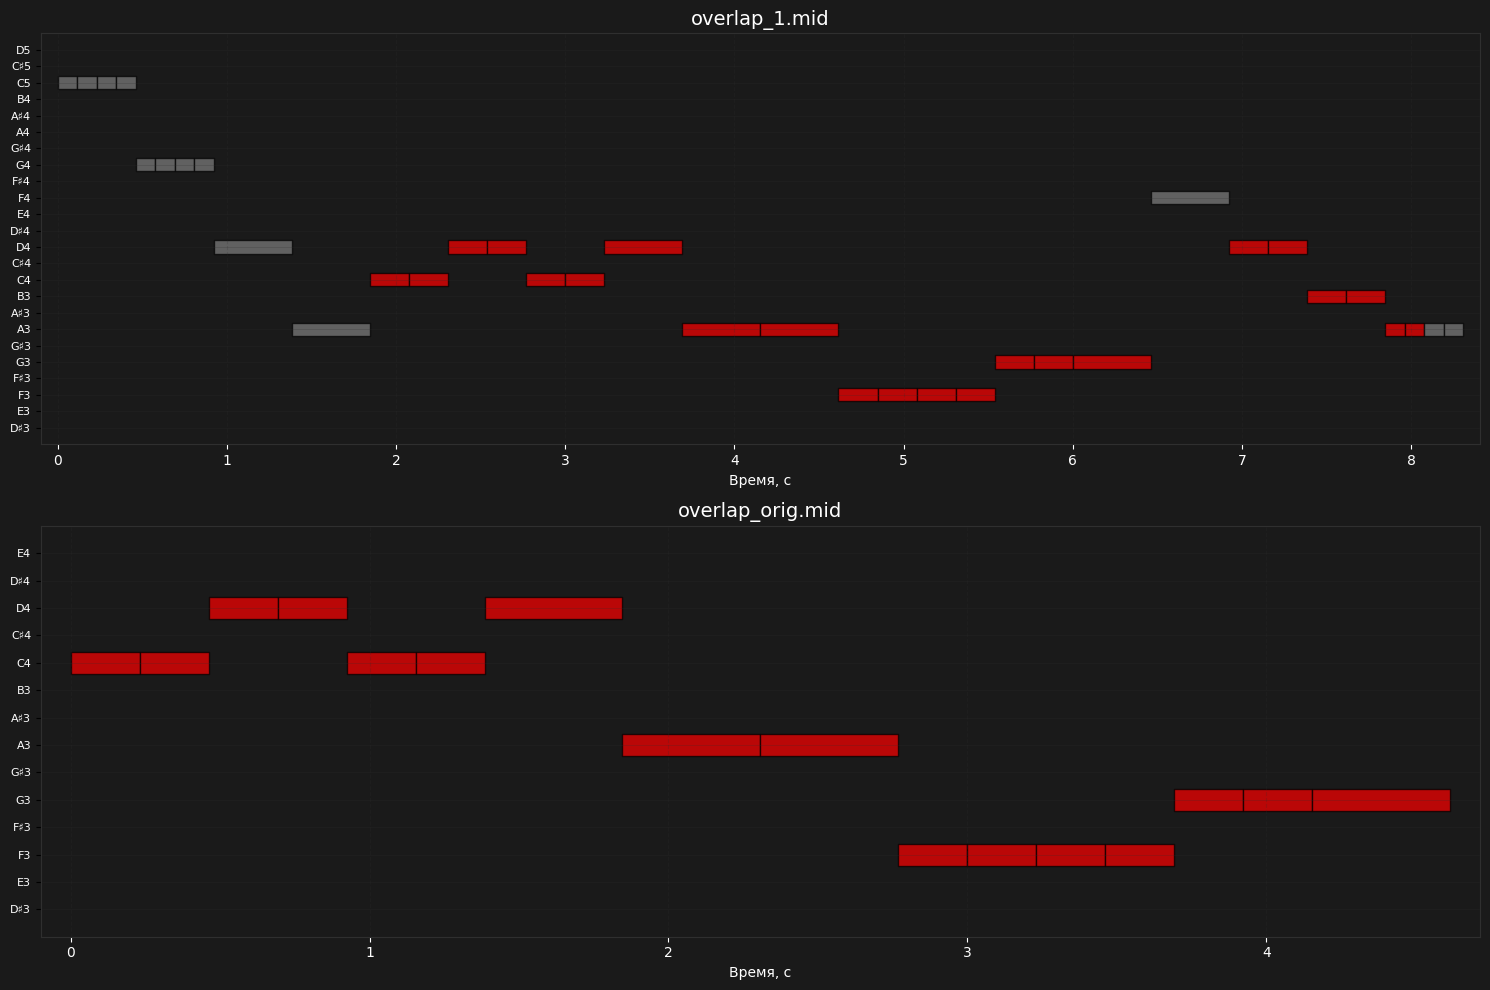

In [7]:
base_melody_path = Path("..\\..\\datasets\\MelodyNet\\test\\labels\\overlap_1.mid")
base_melody = Melody.from_midi(base_melody_path)

overlap_files = sorted([
    f for f in Path("..\\..\\datasets\\MelodyNet\\test\\labels").glob("overlap_*.mid") 
    if f.name != base_melody_path.name
])

for overlap_file in overlap_files:

    melody2 = Melody.from_midi(overlap_file)
    
    matcher = SmithWatermanMelodyMatcher(base_melody, melody2)
    patterns = matcher.find_patterns(
        min_length=MIN_LENGTH, 
        match_score=MATCH_SCORE, 
        mismatch_score=MISMATCH_SCORE, 
        gap_penalty=GAP_PENALTY, 
        tolerance=TOLERANCE,
        threshold_ratio=THRESHOLD_RATIO
    )
        
    print(f"Similarity: {matcher.calculate_similarity():.2f}")
    matcher.visualize_matches(subplot_titles=(base_melody_path.name, overlap_file.name), subplot_title_fontsize=14)

Similarity: 0.00


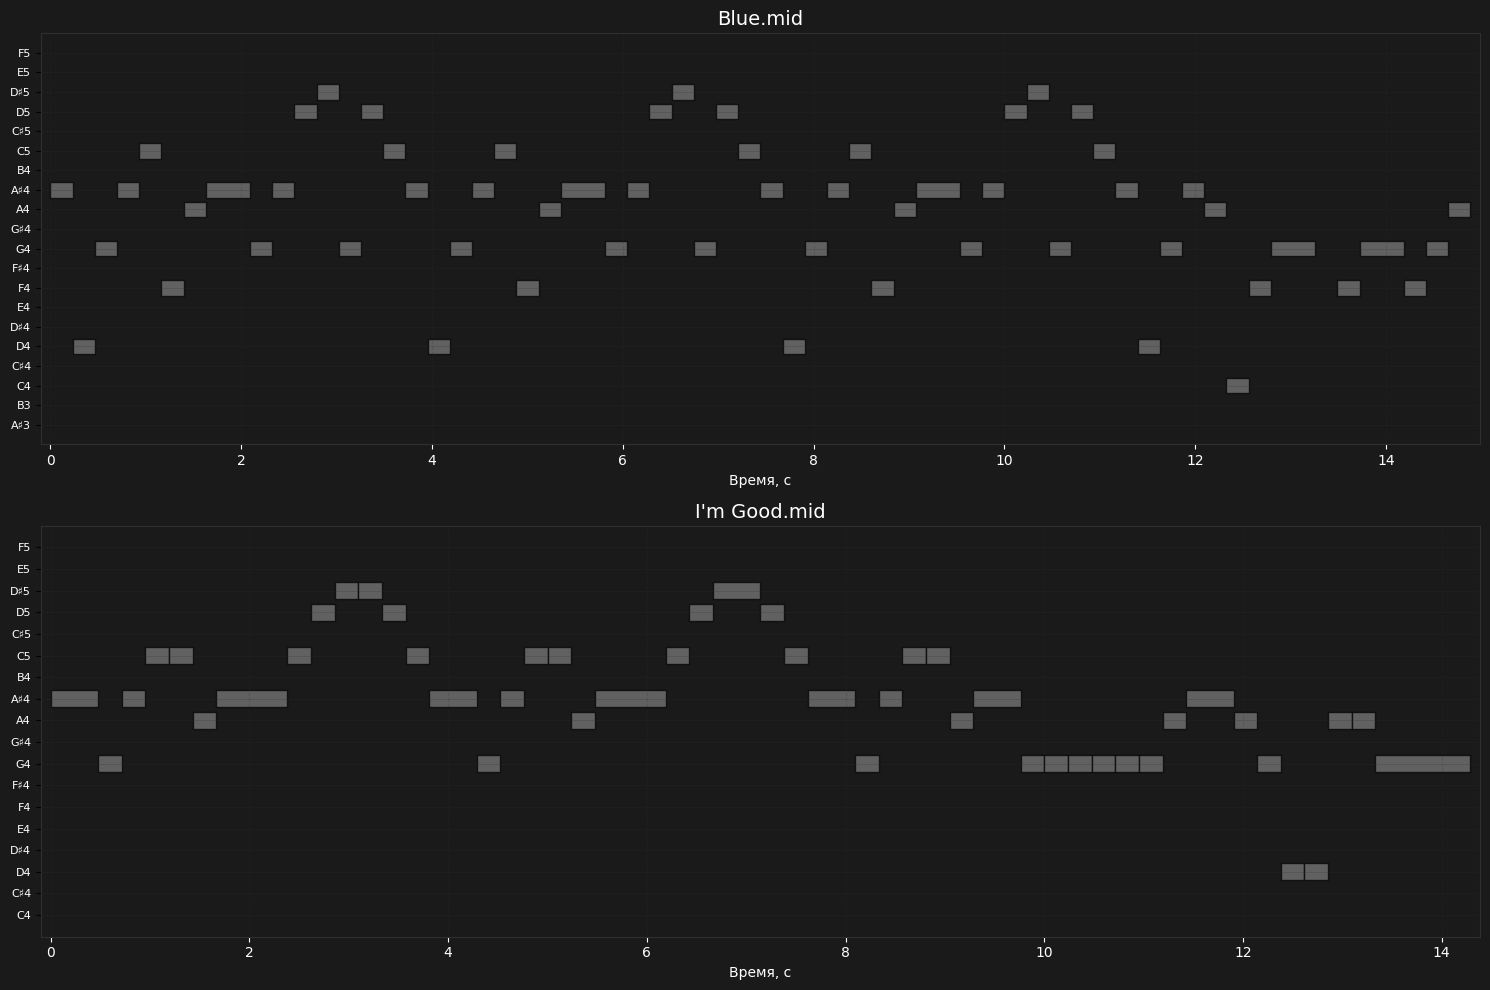

Similarity: 0.32


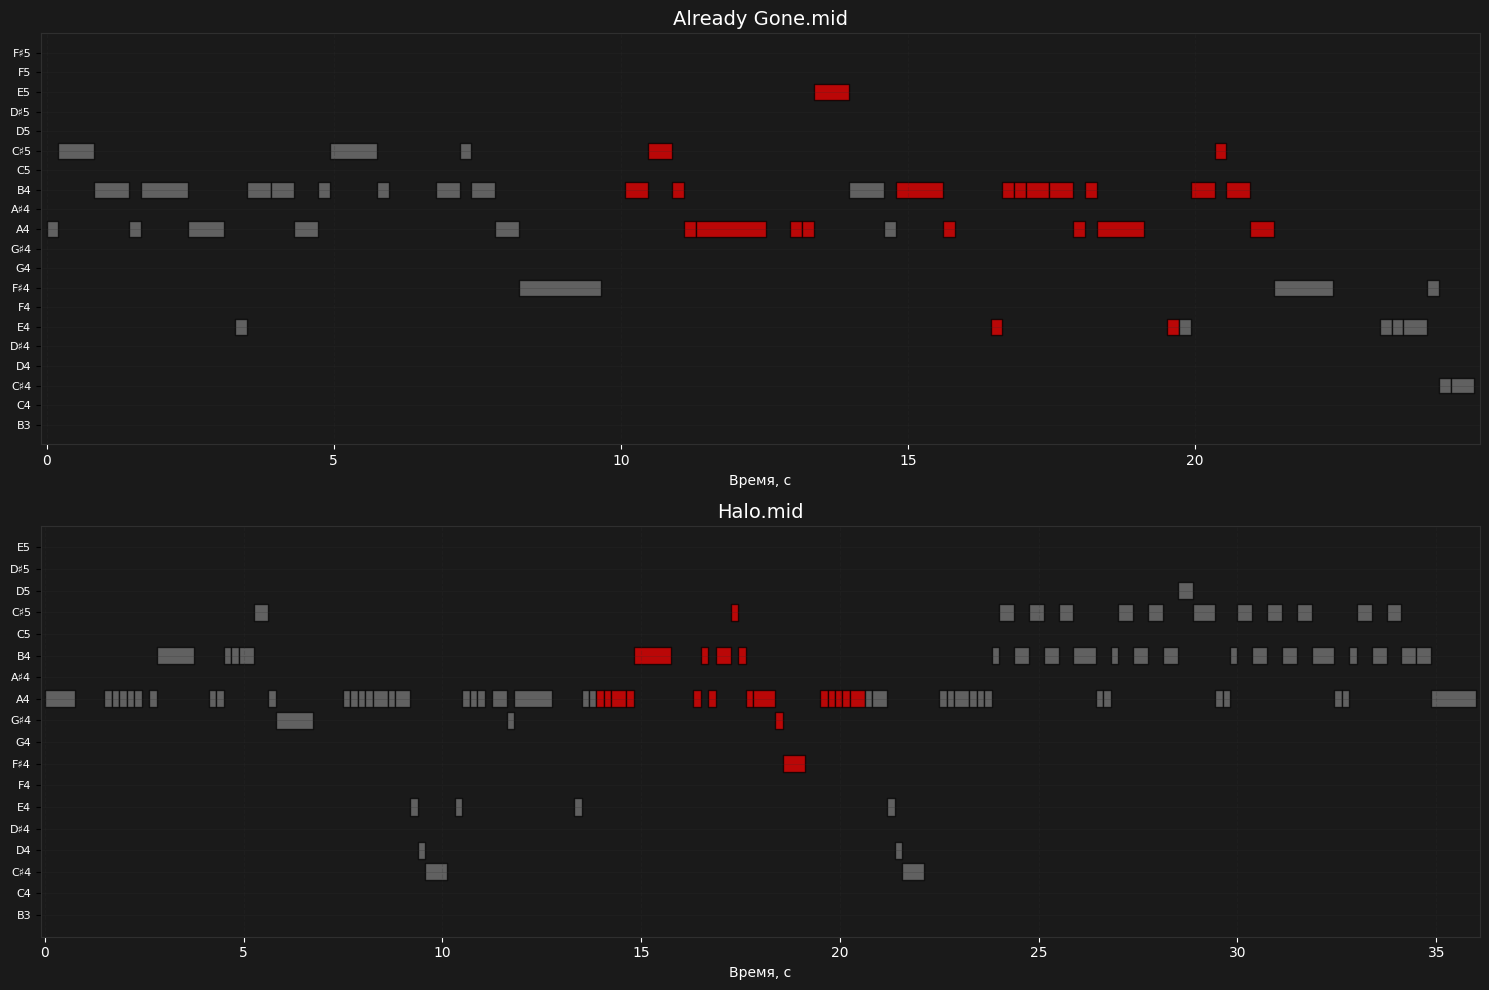

Similarity: 0.73


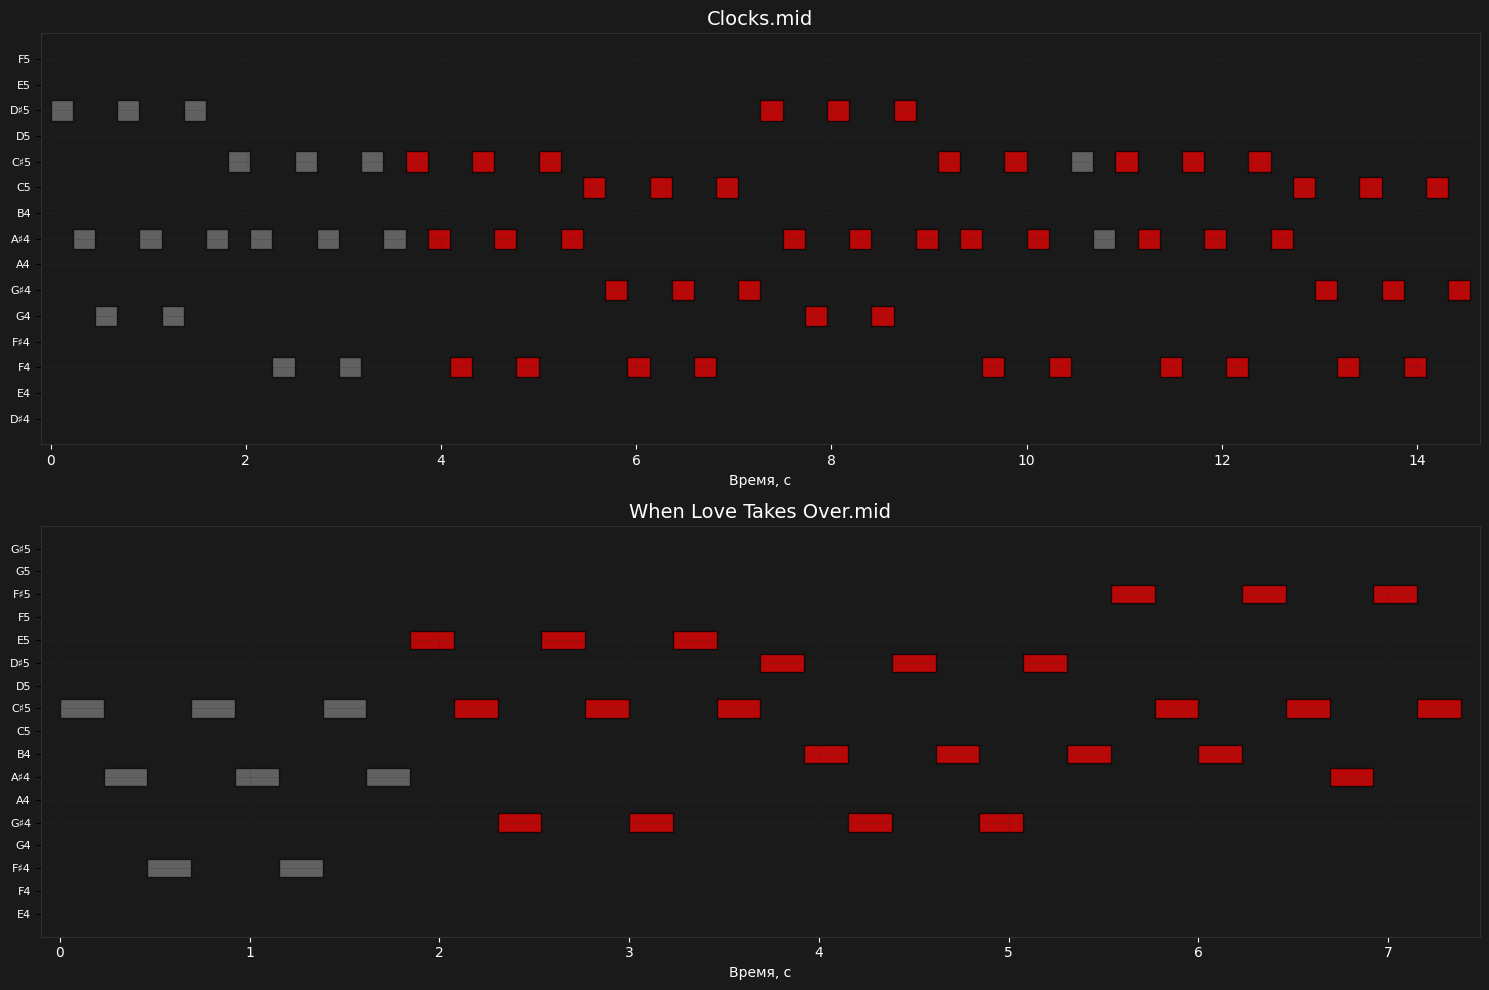

Similarity: 0.39


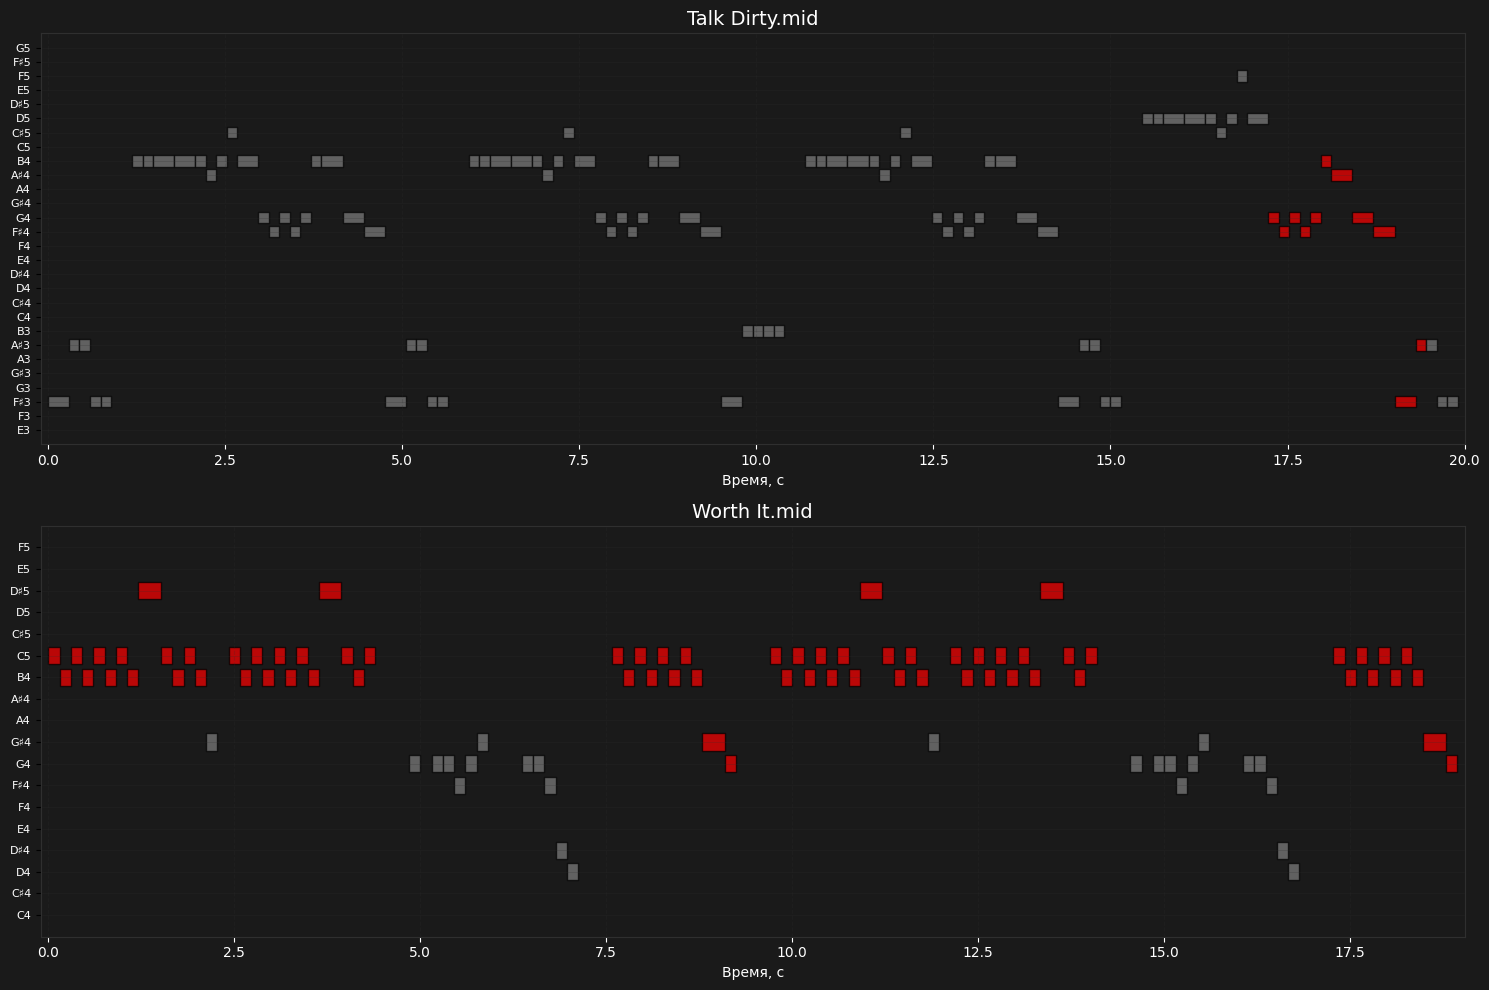

Similarity: 0.70


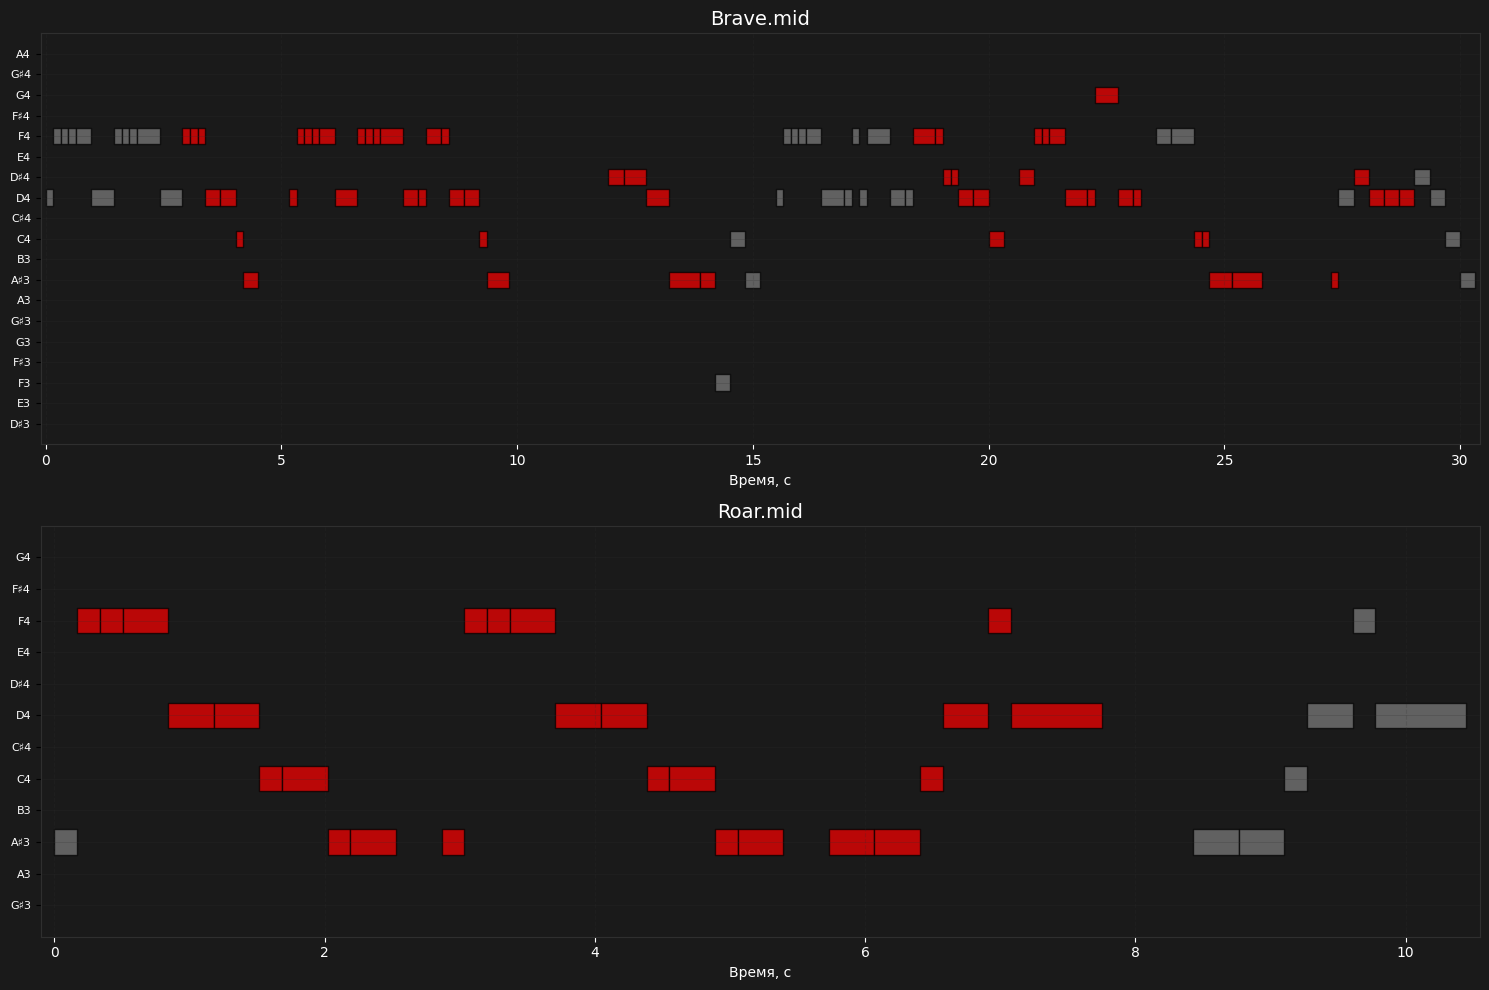

Similarity: 0.00


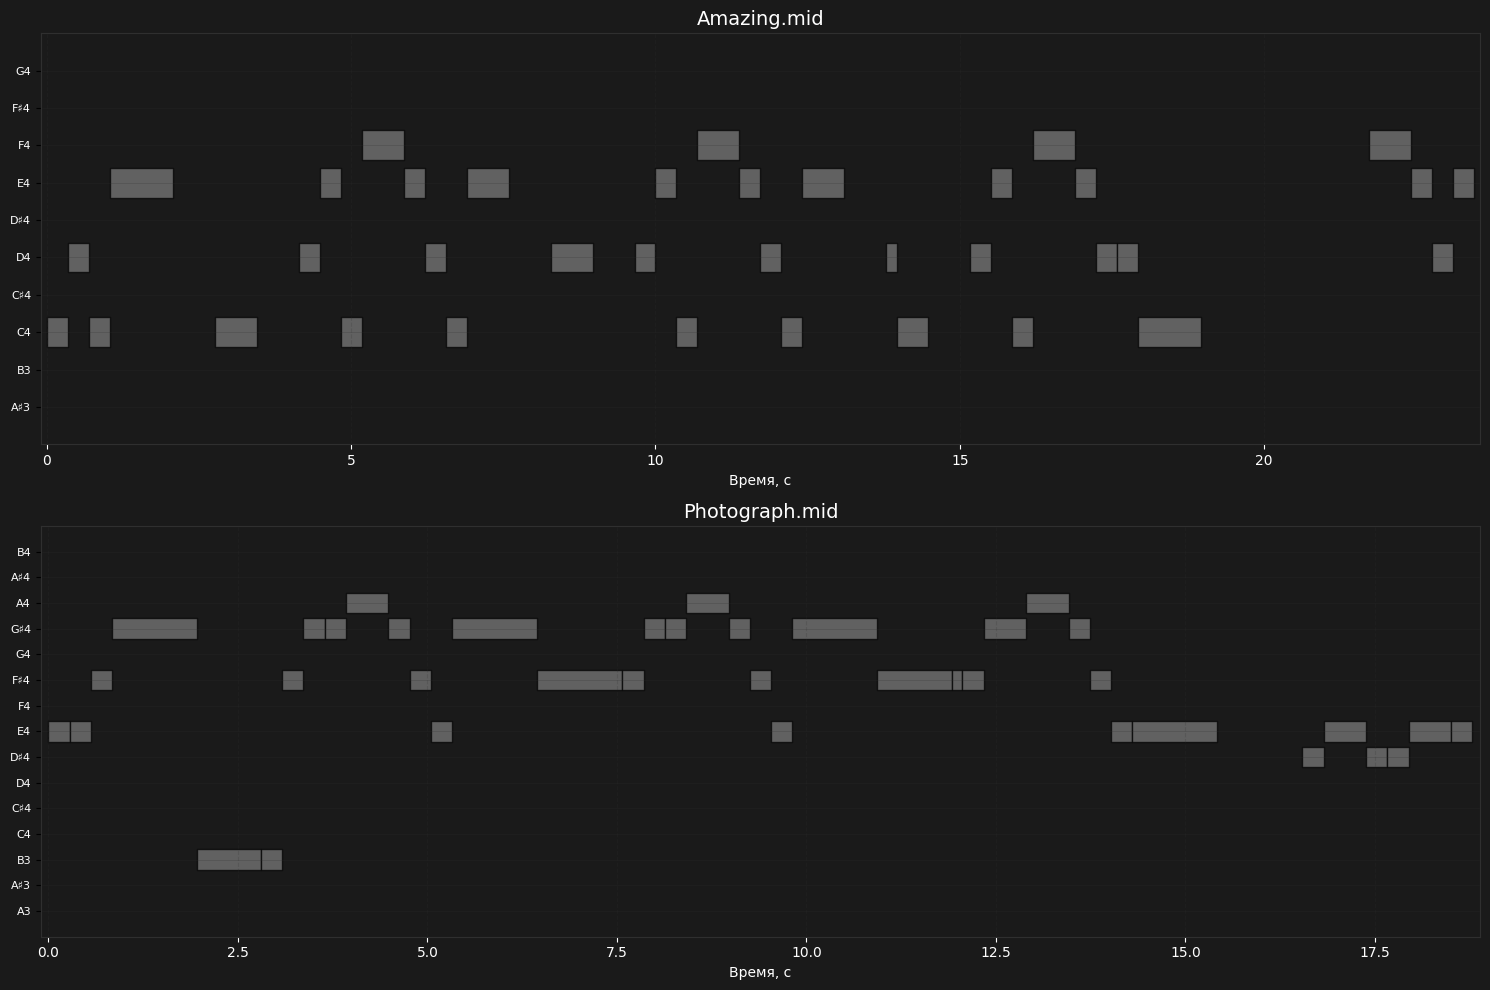

Similarity: 0.56


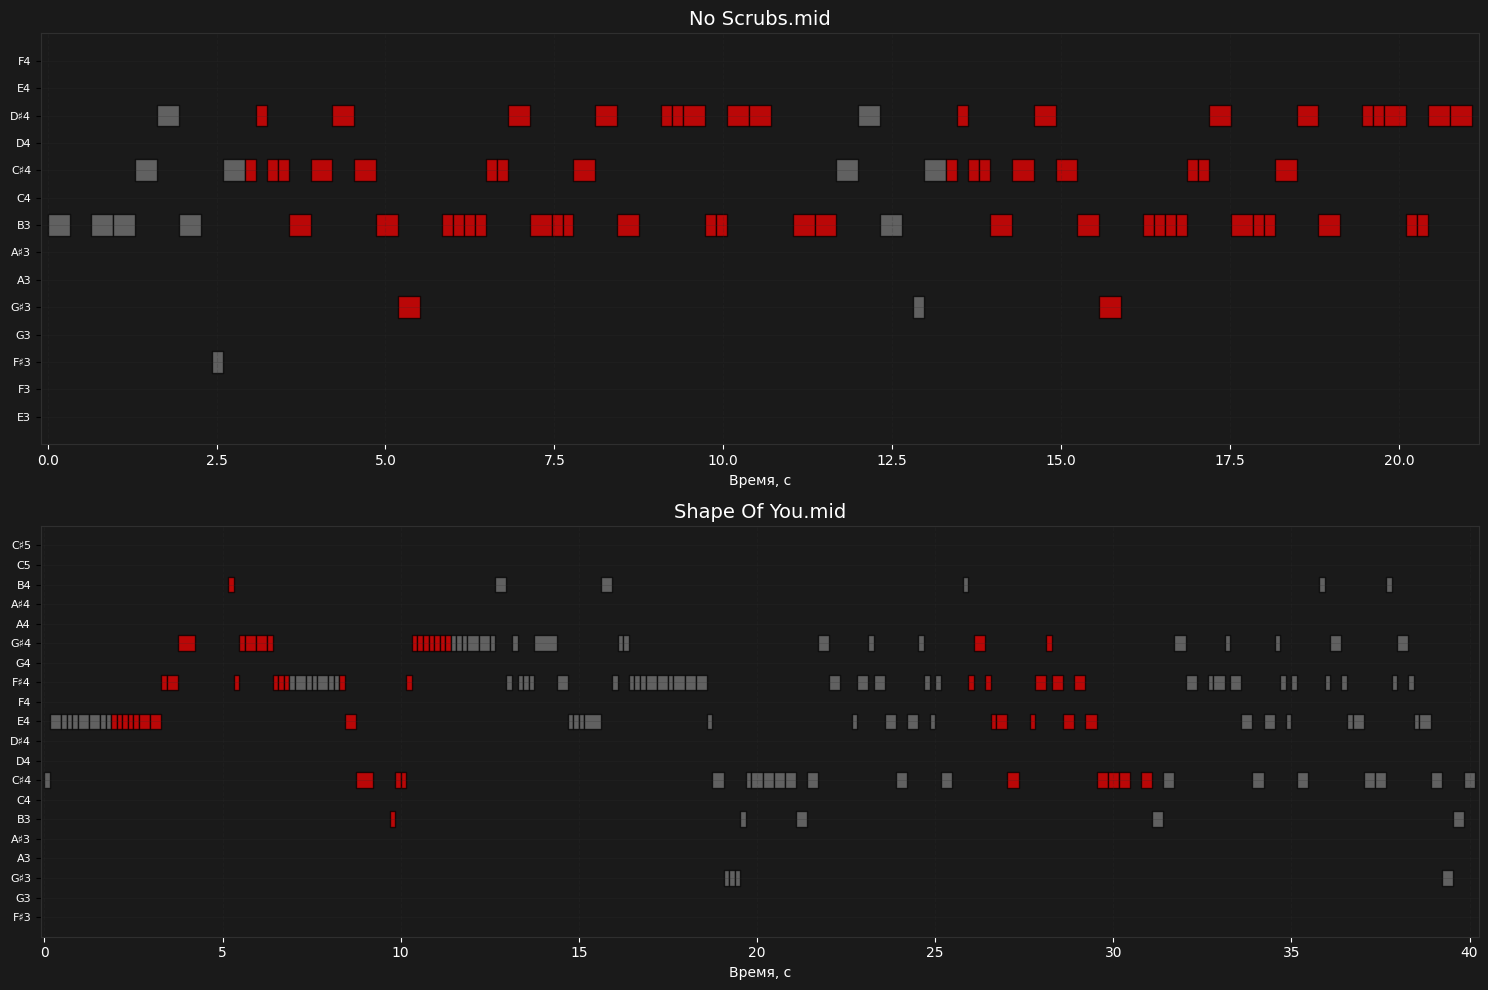

Similarity: 0.31


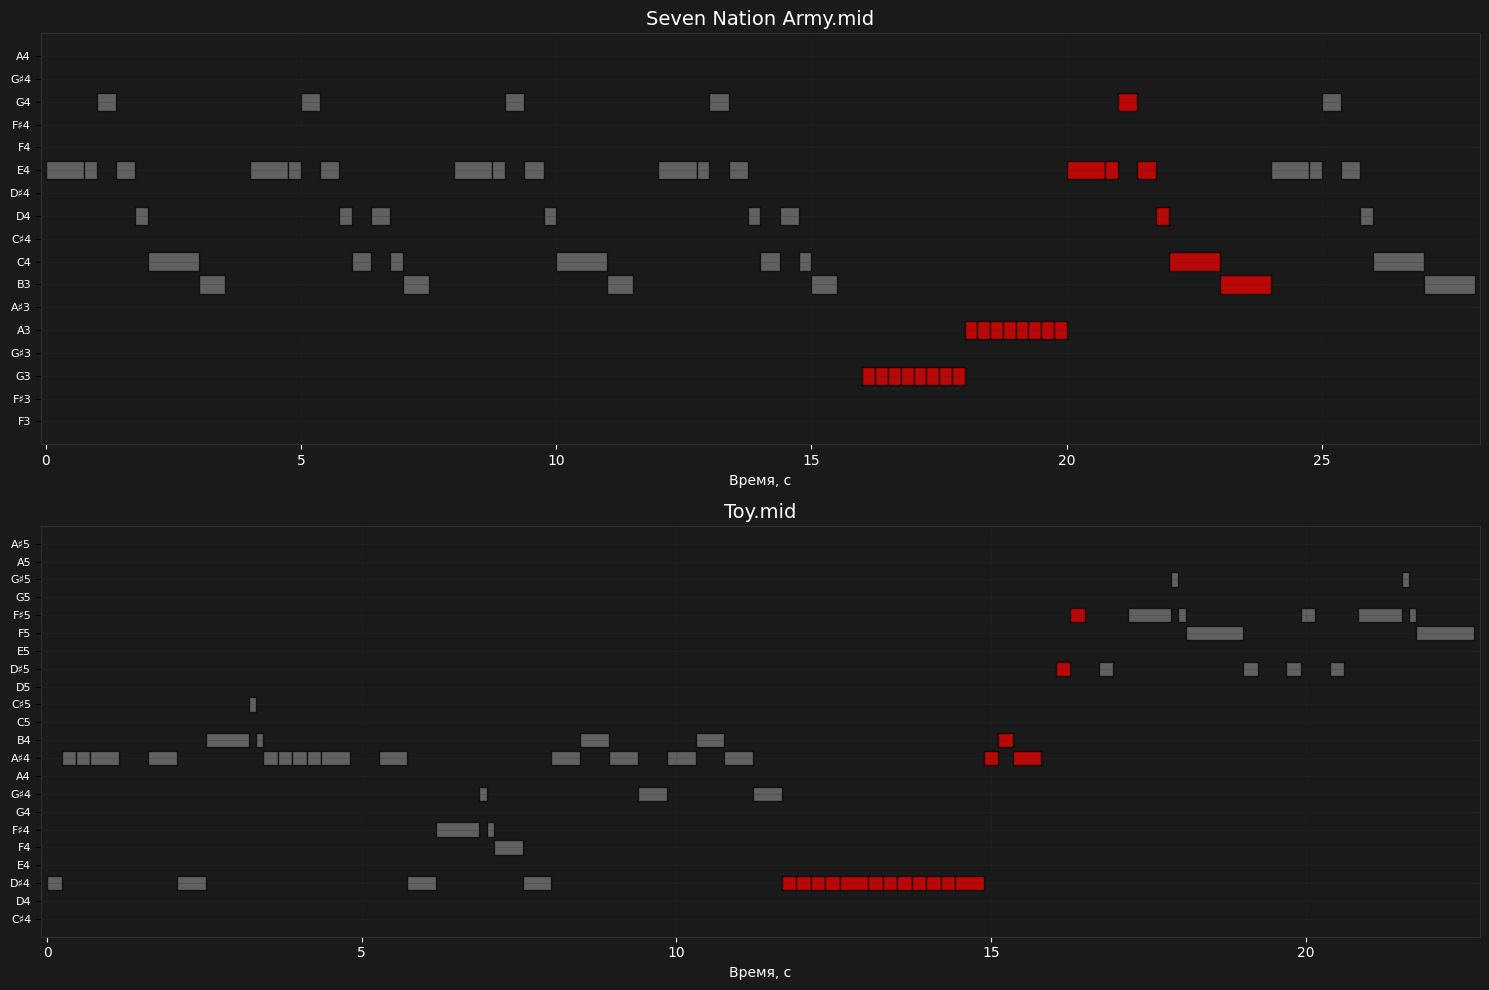

Similarity: 0.55


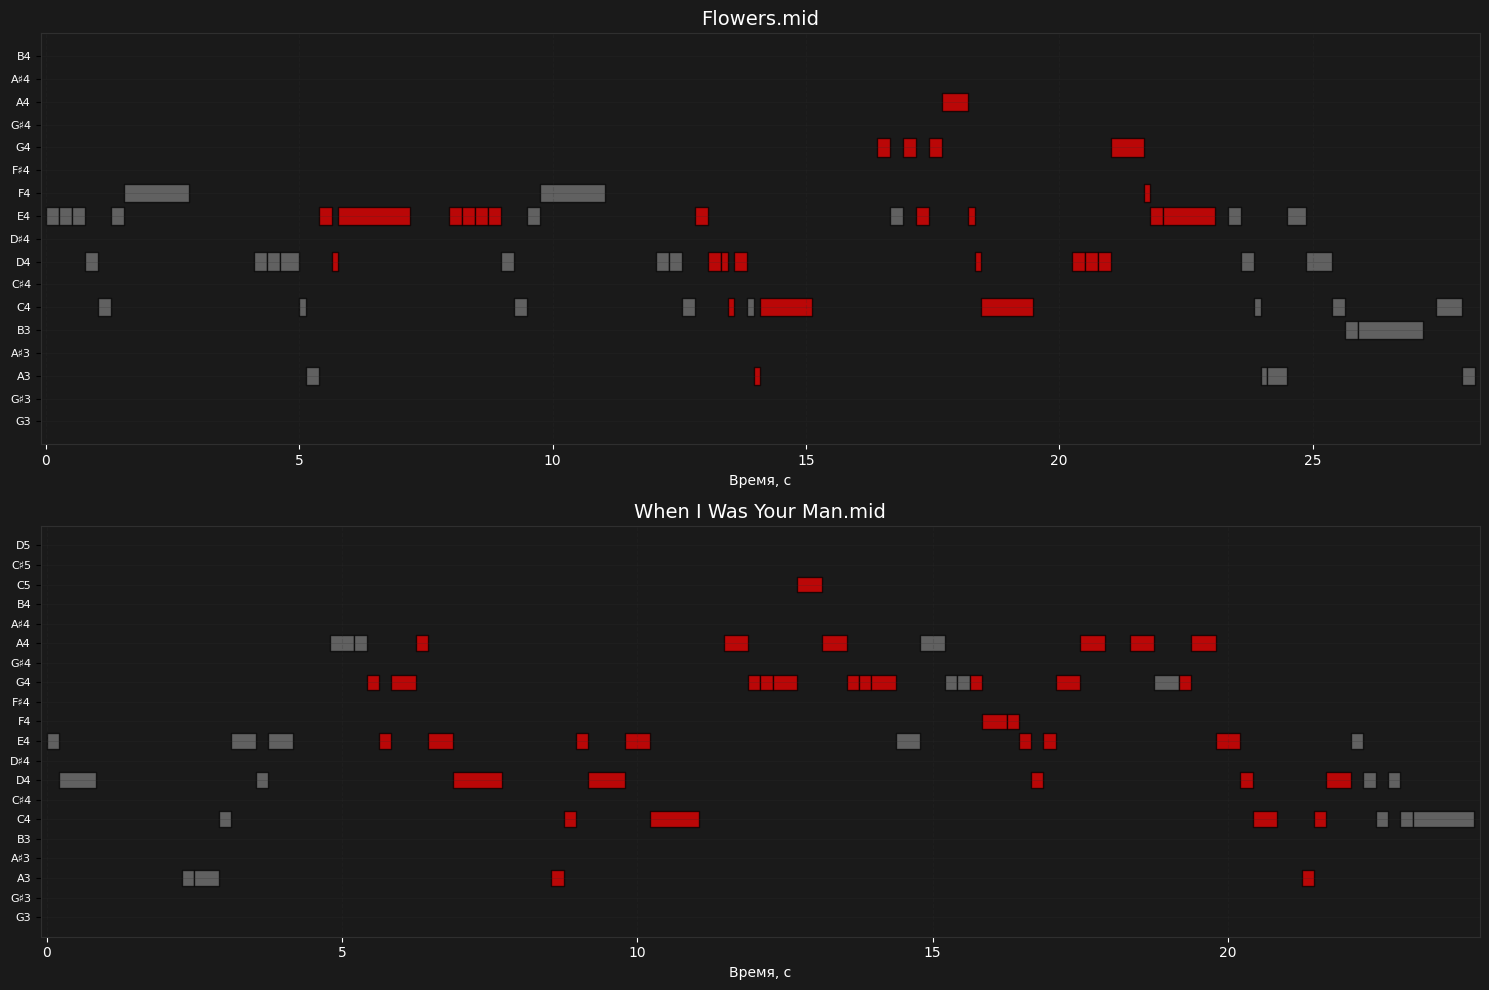

Similarity: 0.95


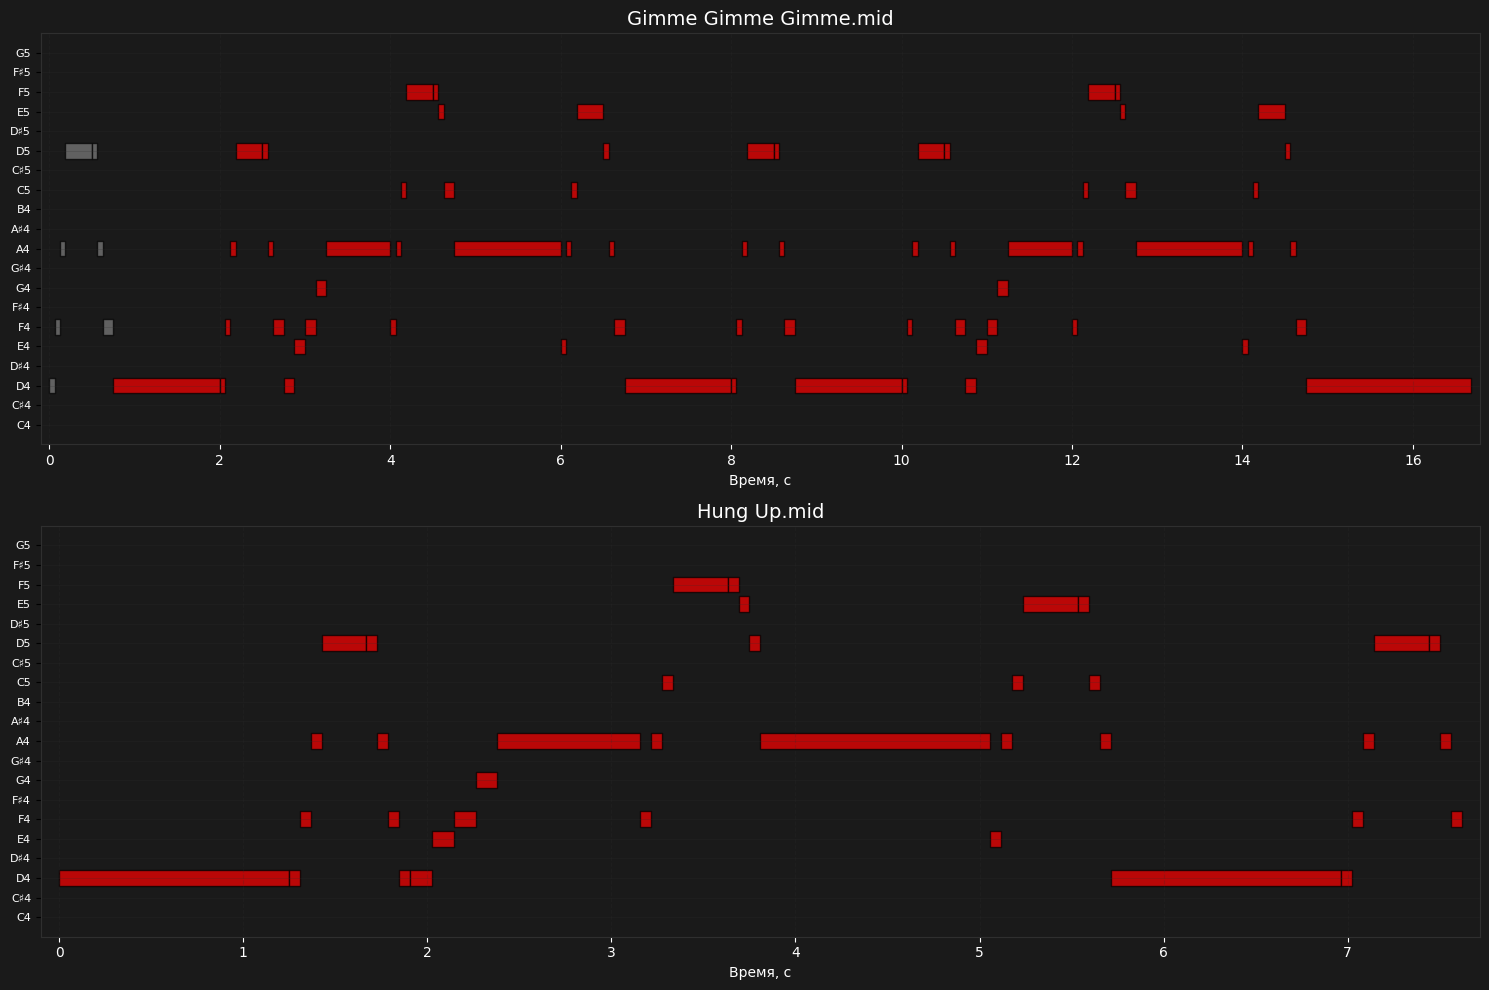

Similarity: 0.95


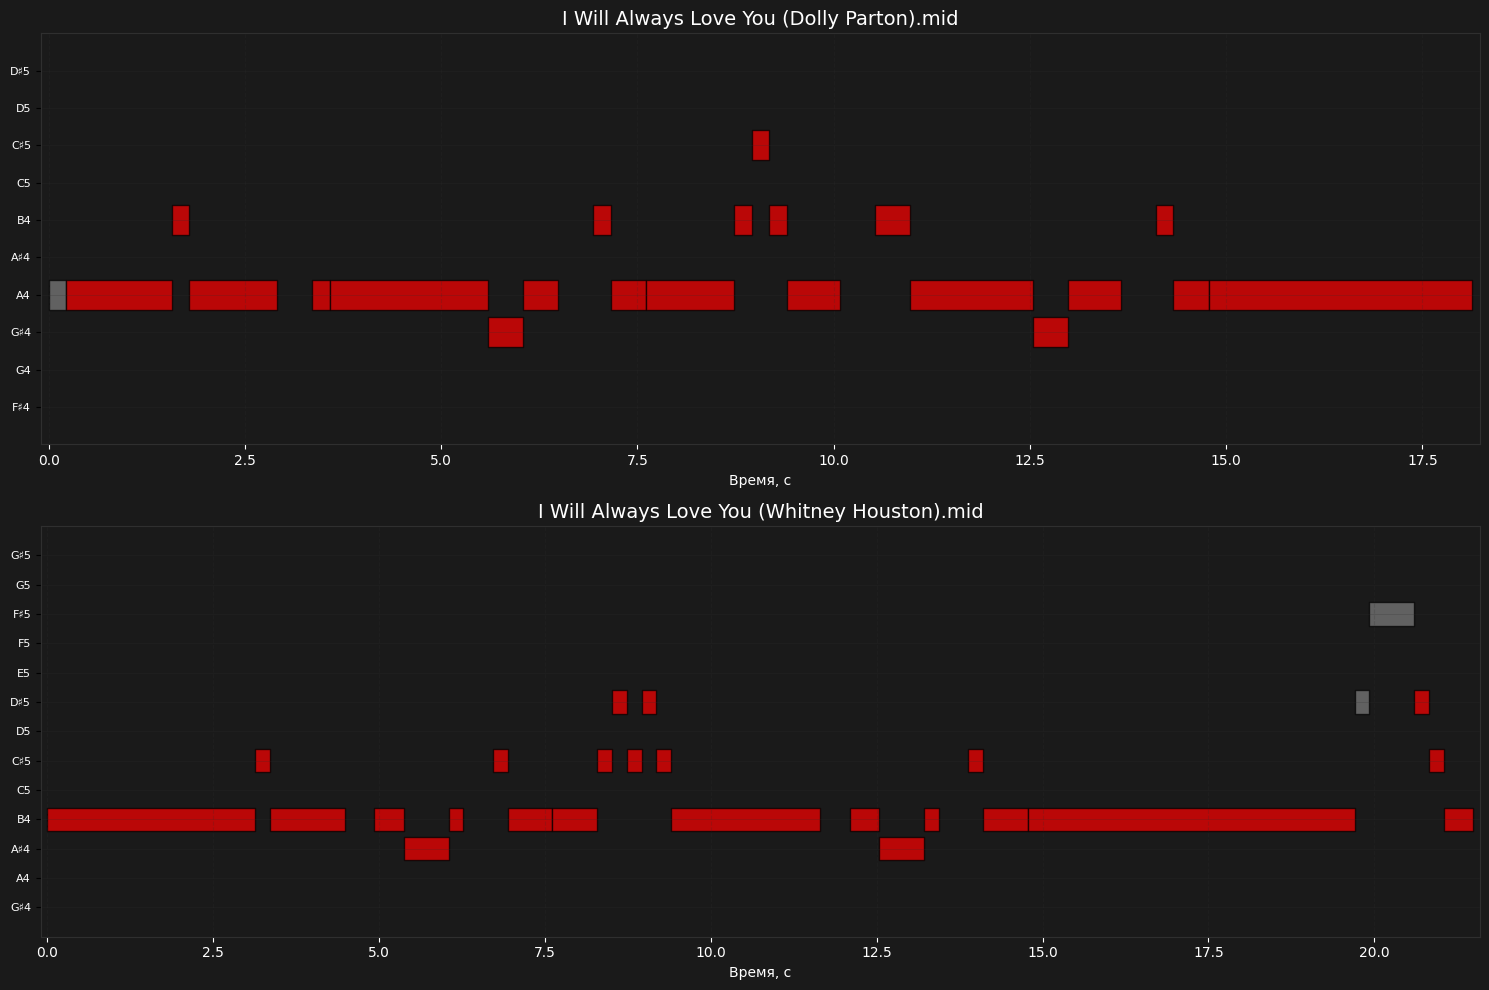

Similarity: 0.00


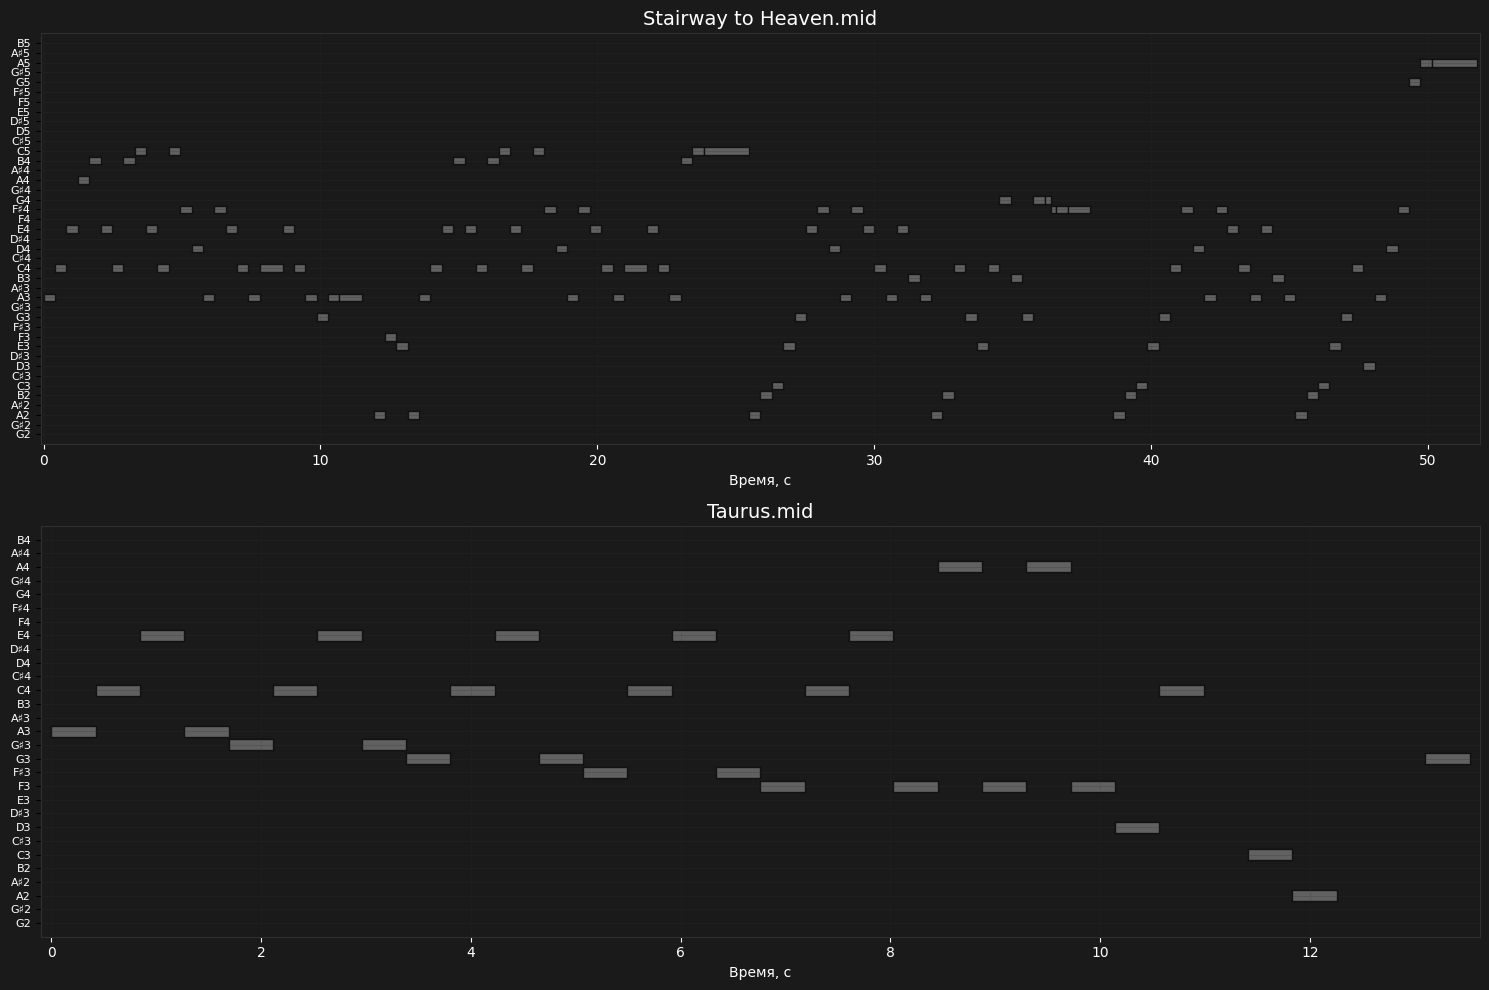

Similarity: 1.00


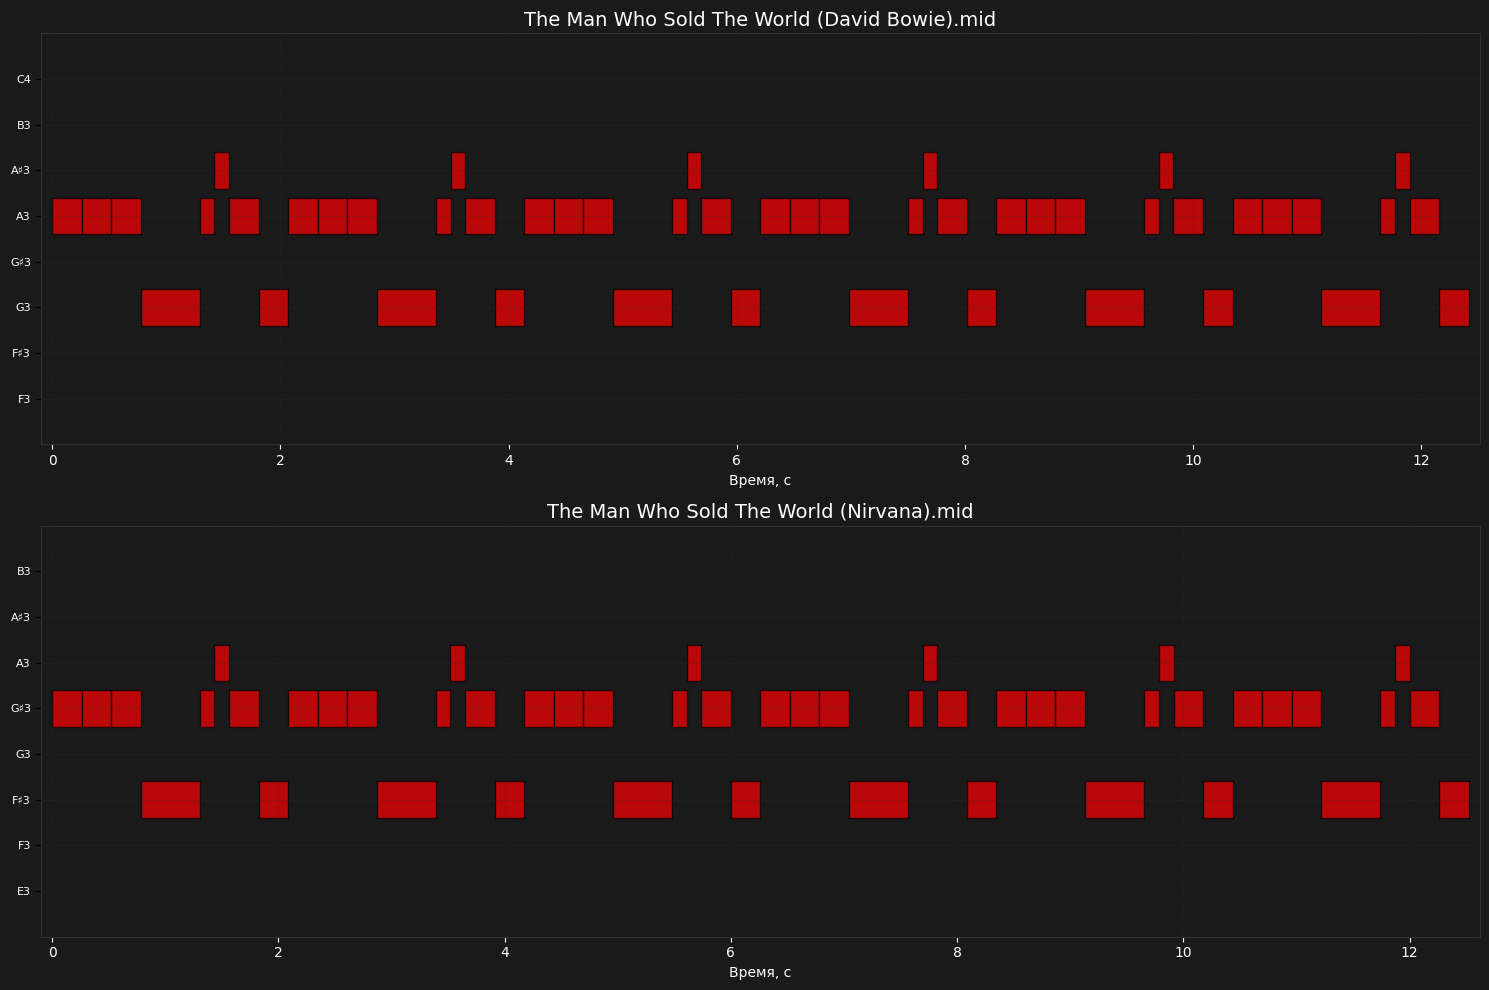

Similarity: 0.58


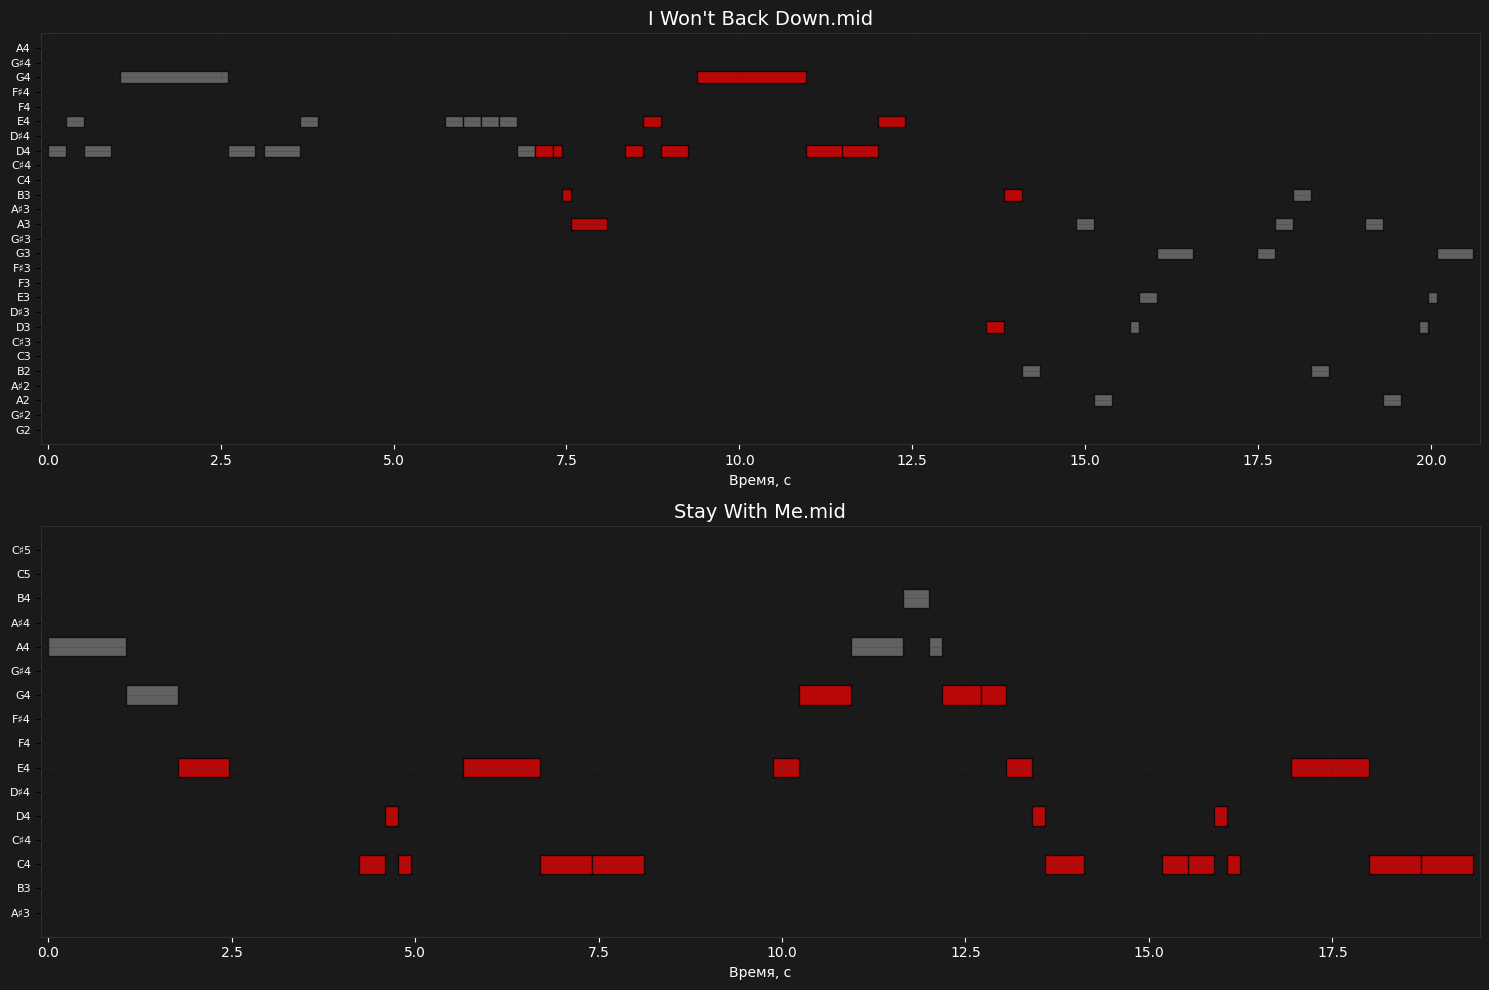

Similarity: 0.36


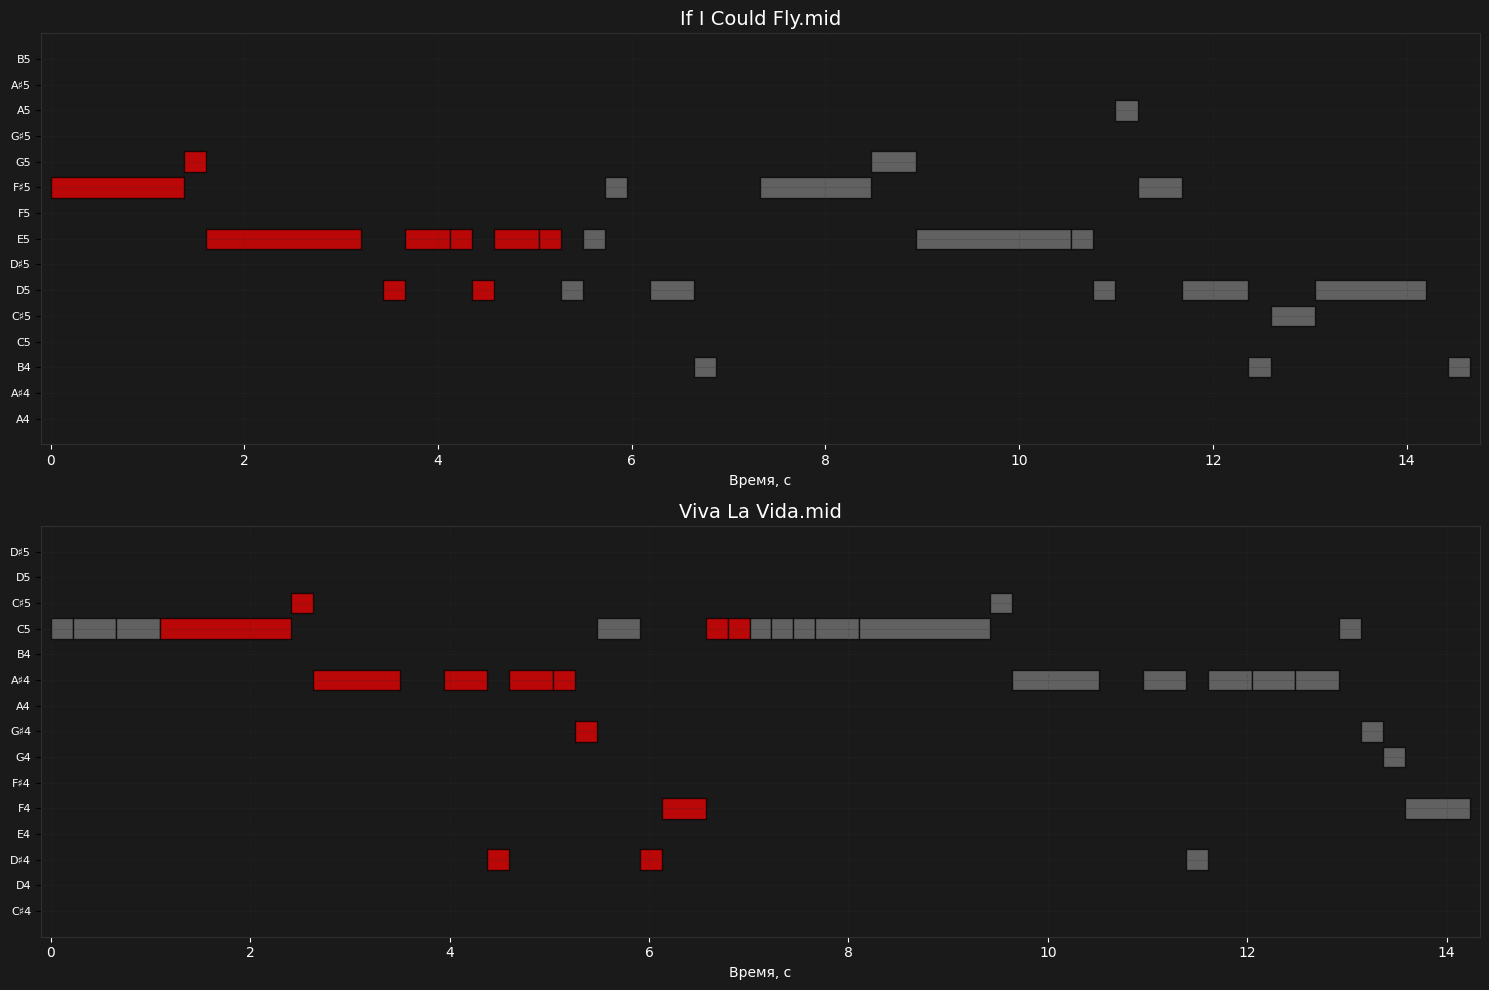

Similarity: 0.61


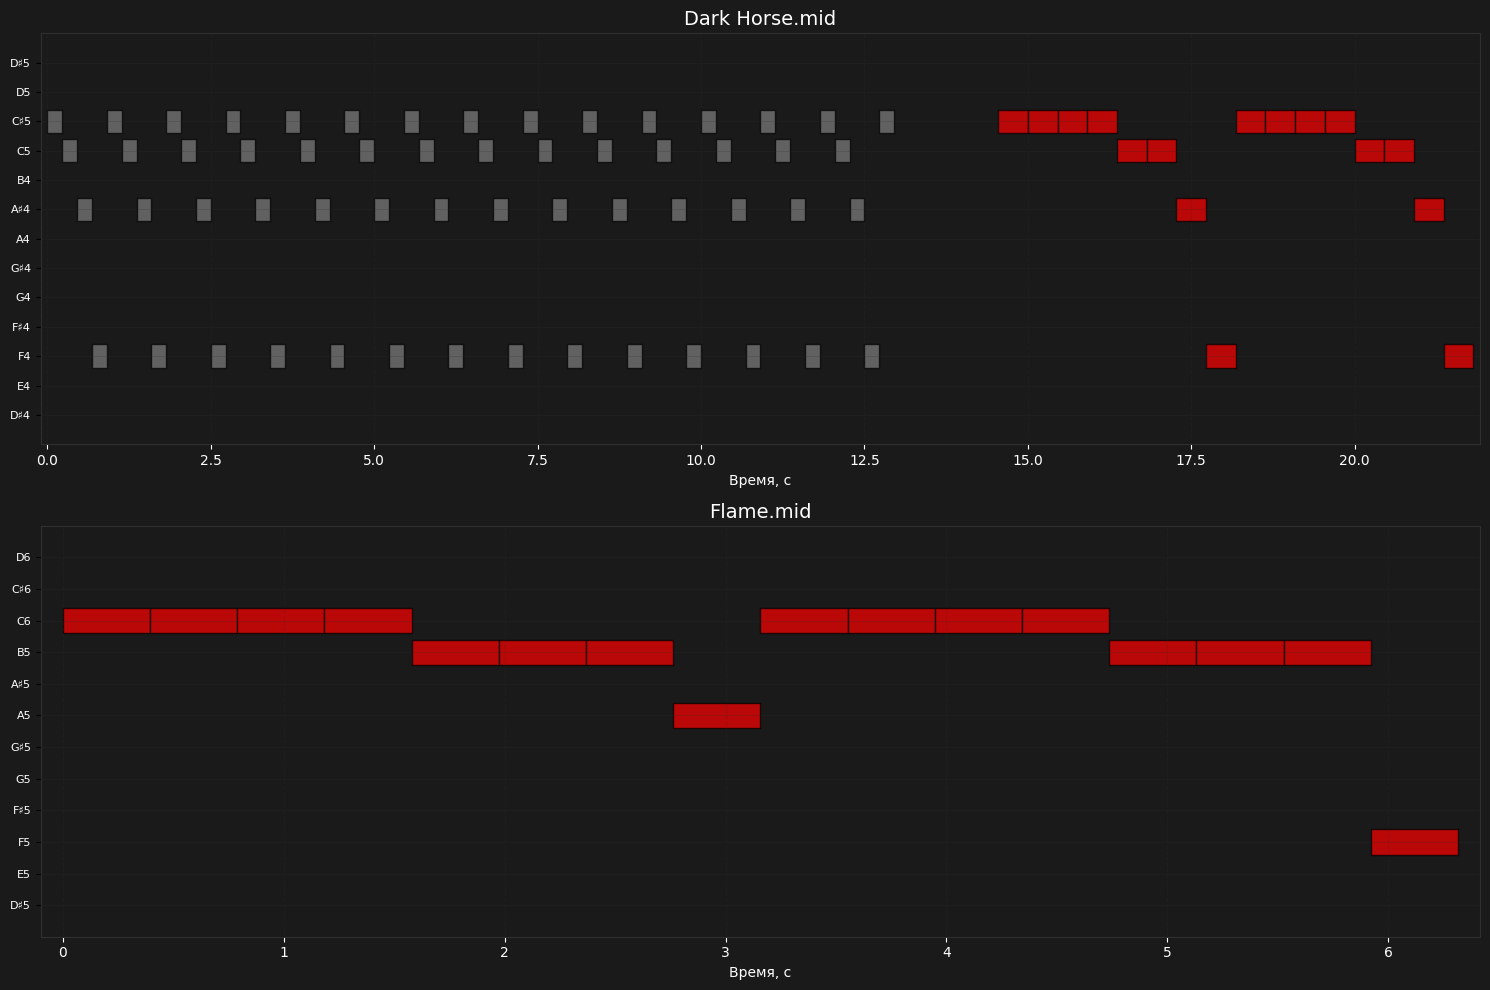

Similarity: 0.58


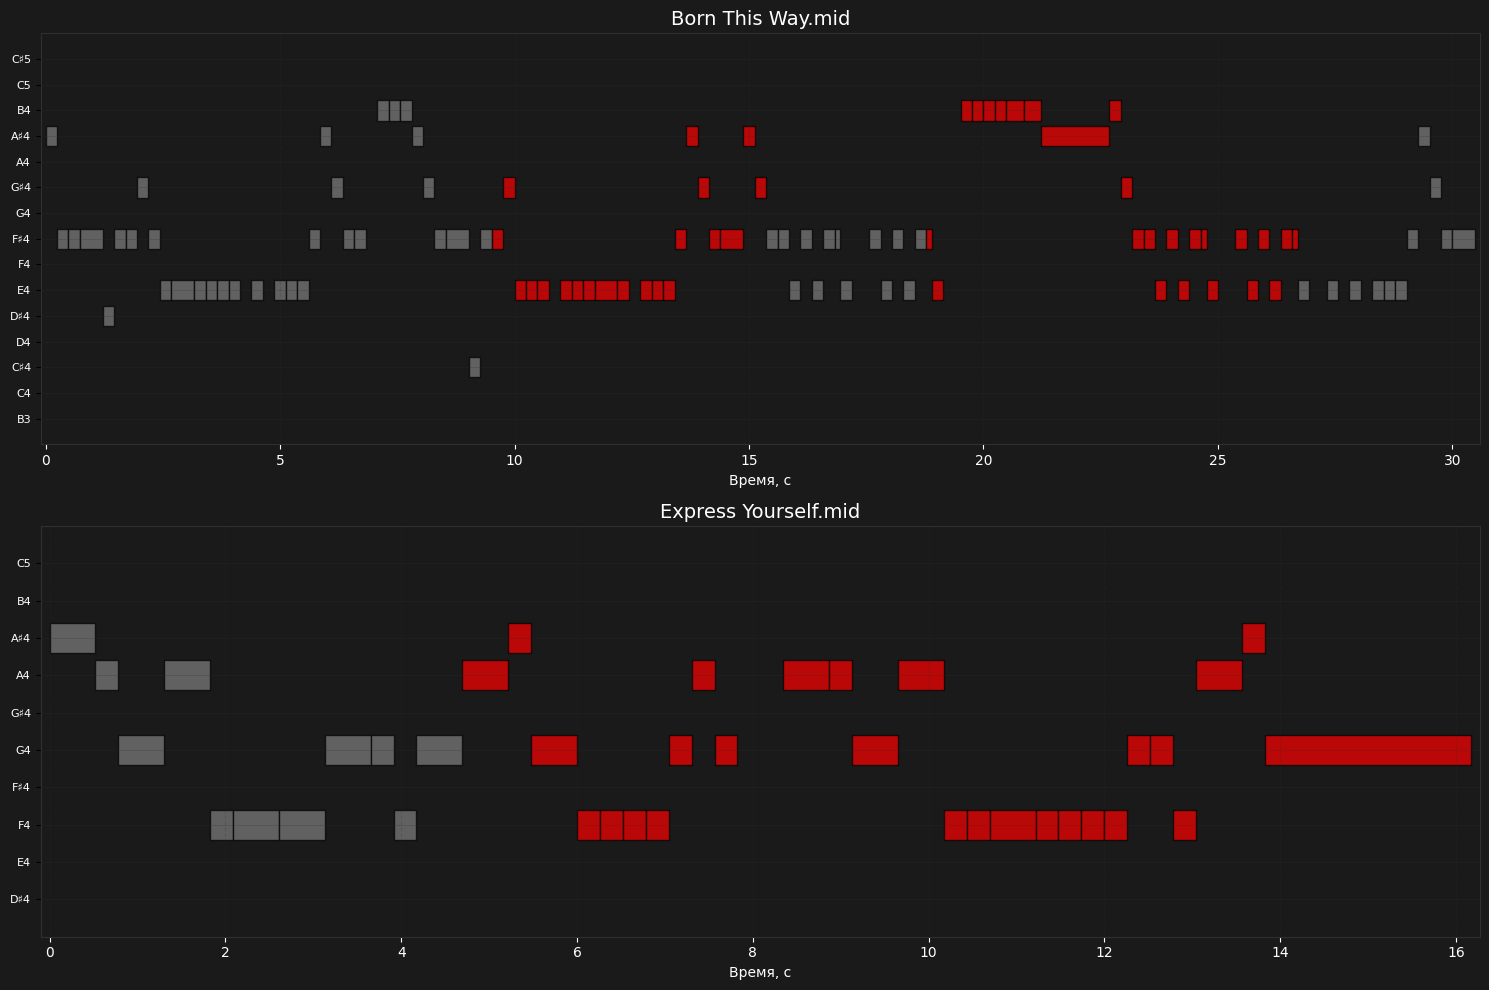

Similarity: 0.00


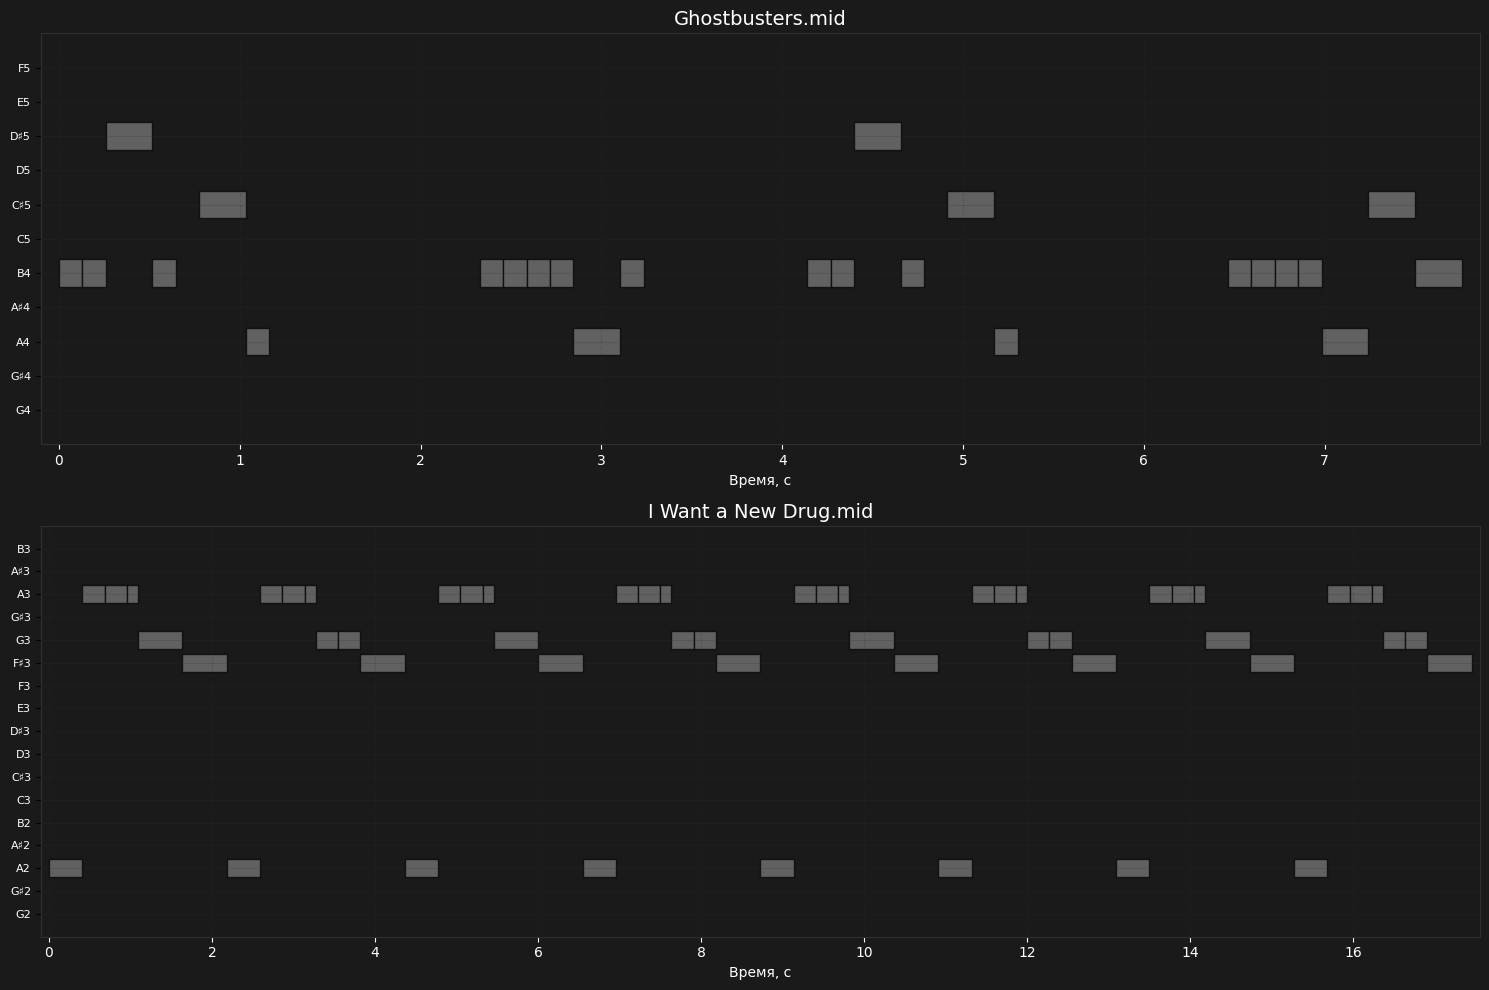

Similarity: 0.31


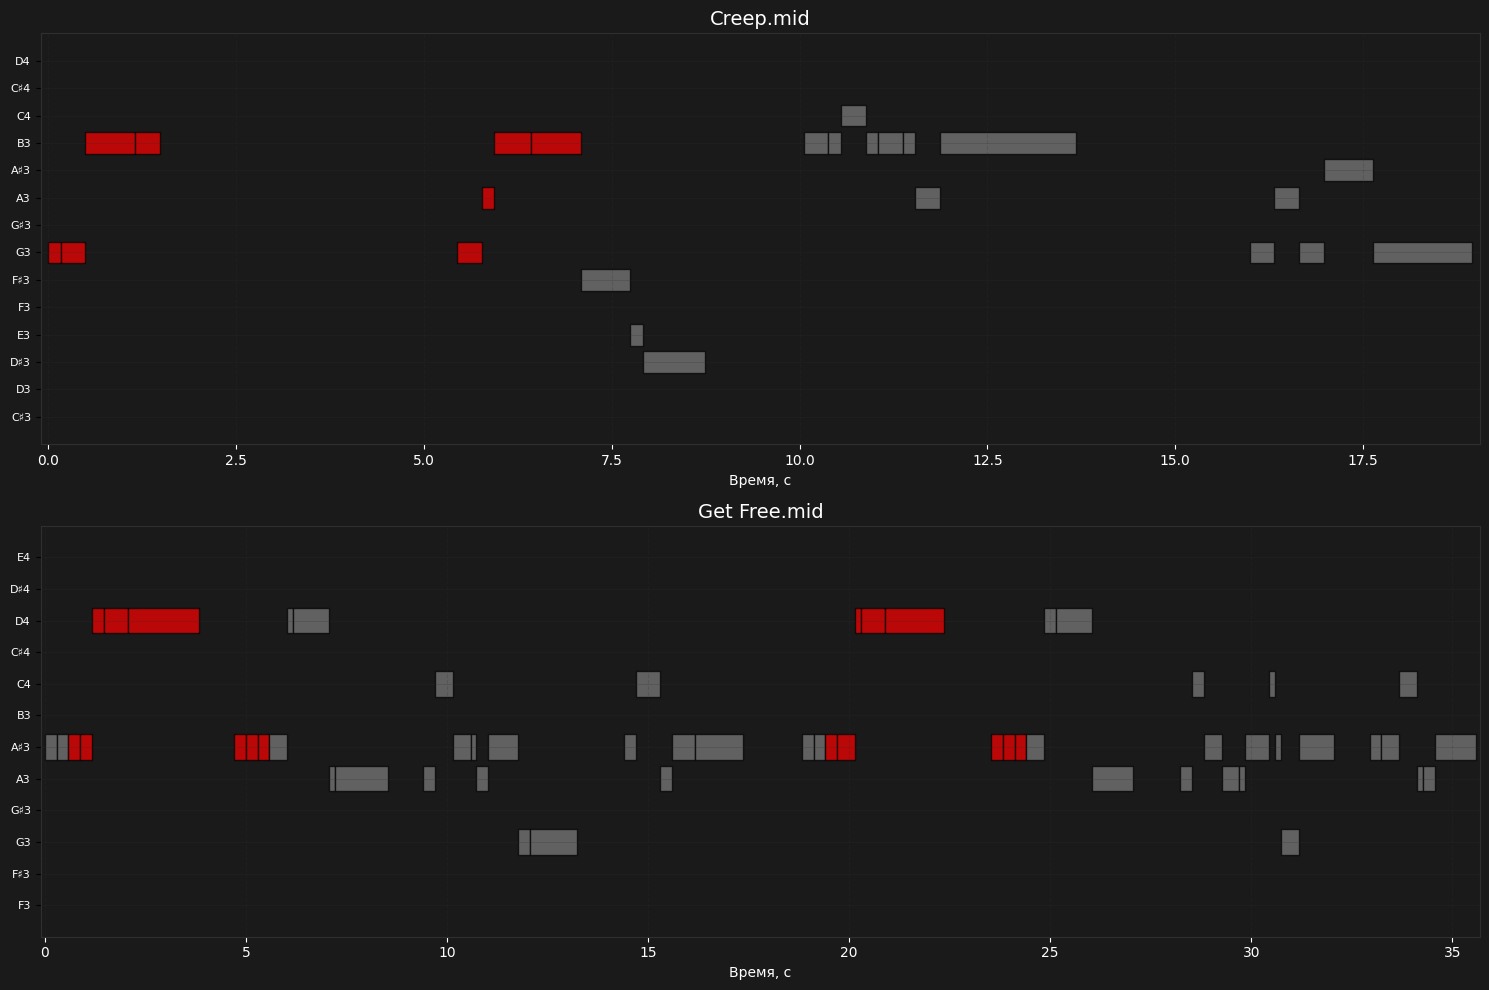

Similarity: 0.69


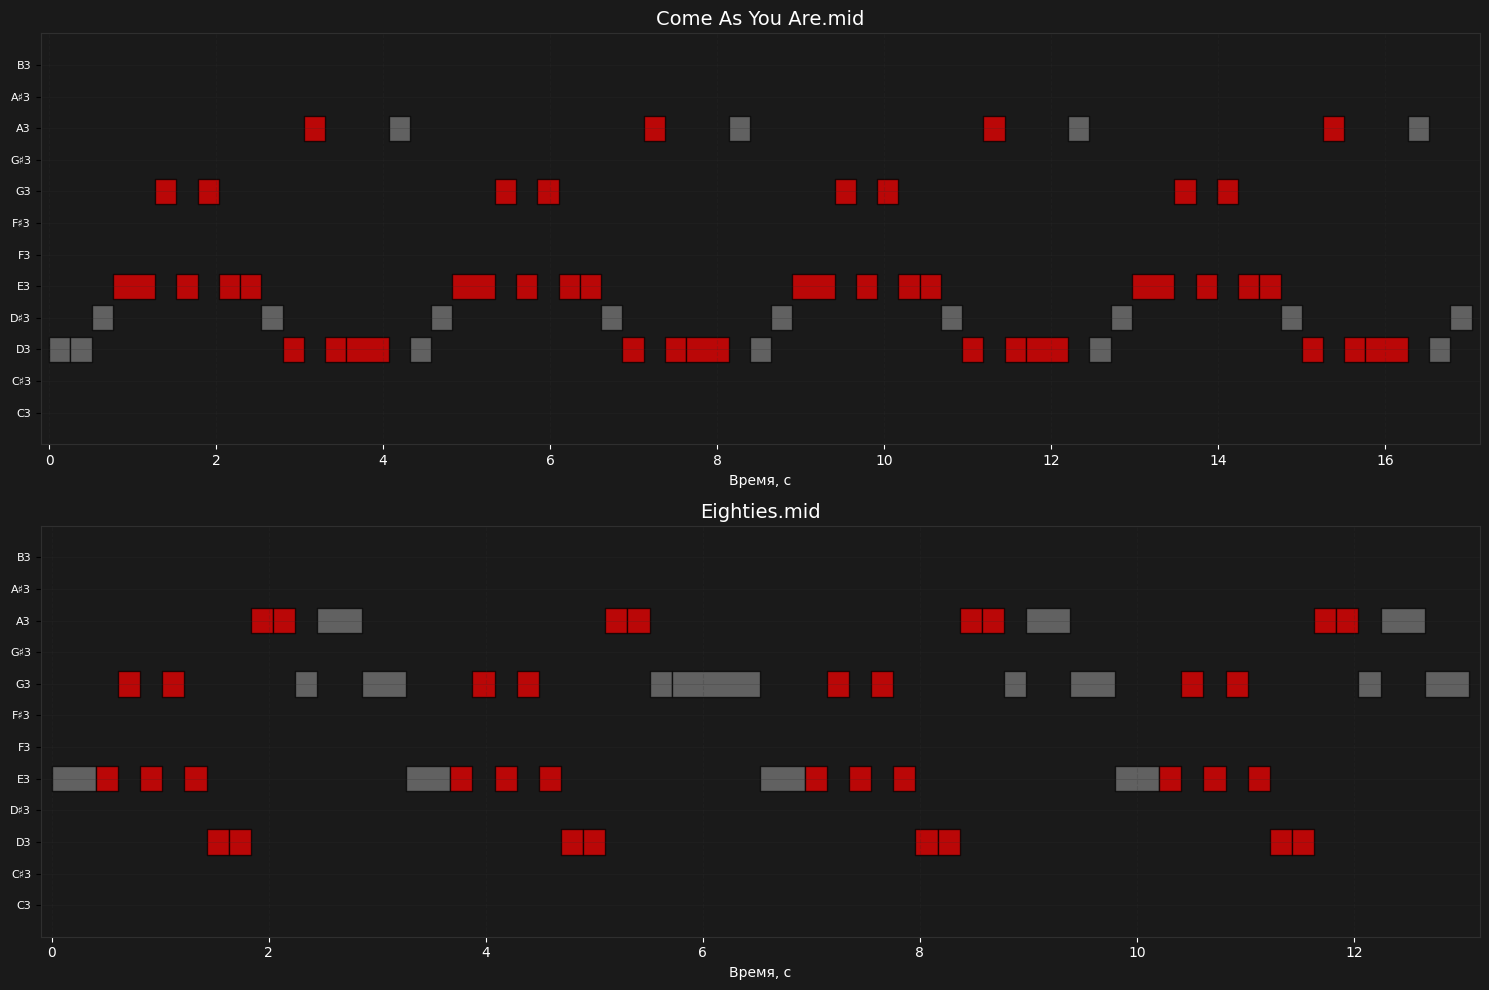

In [8]:
for case_dir in sorted(Path("..\\..\\datasets\\PlagiNet\\cases").iterdir()):

    if case_dir.is_dir():
        midi_files = list(case_dir.rglob("*.mid"))

        melody1 = Melody.from_midi(midi_files[0])
        melody2 = Melody.from_midi(midi_files[1])
        
        matcher = SmithWatermanMelodyMatcher(melody1, melody2)
        patterns = matcher.find_patterns(
            min_length=MIN_LENGTH, 
            match_score=MATCH_SCORE, 
            mismatch_score=MISMATCH_SCORE, 
            gap_penalty=GAP_PENALTY, 
            tolerance=TOLERANCE,
            threshold_ratio=THRESHOLD_RATIO
        )
        print(f"Similarity: {matcher.calculate_similarity():.2f}")
        matcher.visualize_matches(subplot_titles=(midi_files[0].name, midi_files[1].name), subplot_title_fontsize=14)